### Import Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import requests

### Load the dataset

In [79]:
# file_path = 'events.csv' 
# df = pd.read_csv(file_path)

In [ ]:
# URL of the endpoint
url = "http://127.0.0.1:8000/get_dataset/?format=csv"

response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print(df.head()) 
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


               user_id                 event_time event_type  product_id  \
0  1515915625519380411  2020-09-24 11:57:26+00:00       view      139905   
1  1515915625519014356  2020-09-24 11:57:33+00:00       view      635807   
2  1515915625519388062  2020-09-24 11:57:59+00:00       view      664325   
3  1515915625519388882  2020-09-24 11:58:24+00:00       view      716611   
4  1515915625519388929  2020-09-24 11:58:31+00:00       view      716611   

           category_id   brand   price      category product_name  
0  2144415926932472027  zalman   17.16     computers       cooler  
1  2144415923107266682  pantum  113.81     computers      printer  
2  2144415951611757447  carver   52.33  construction          saw  
3  2144415923694469257  d-link   53.14     computers       router  
4  2144415923694469257  d-link   53.14     computers       router  


### Preprocessing

In [80]:
# columns_to_keep = ['user_id', 'event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand','price']
# df = df[columns_to_keep].copy()

# null_counts = df.isnull().sum()
# print(null_counts)

user_id               0
event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
dtype: int64


In [81]:
# df_cleaned = df.dropna(subset=['category_code', 'category_id', 'brand'])
# df = df_cleaned


In [82]:
# null_counts = df.isnull().sum()
# print(null_counts)

user_id          0
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
dtype: int64


In [83]:
# split_category = df['category_code'].str.split('.')
# df['category'] = split_category.str[0]
# df['product_name'] = split_category.str[-1]

# df = df.drop(columns='category_code')

# df

user_id               event_time event_type  product_id  \
1       1515915625519380411  2020-09-24 11:57:26 UTC       view      139905   
3       1515915625519014356  2020-09-24 11:57:33 UTC       view      635807   
5       1515915625519388062  2020-09-24 11:57:59 UTC       view      664325   
7       1515915625519388882  2020-09-24 11:58:24 UTC       view      716611   
9       1515915625519388929  2020-09-24 11:58:31 UTC       view      716611   
...                     ...                      ...        ...         ...   
885121  1515915625572947504  2021-02-28 23:51:25 UTC       view      622796   
885122  1515915625611023581  2021-02-28 23:53:13 UTC       view     4079420   
885125  1515915625611024014  2021-02-28 23:58:05 UTC       view     1715907   
885126  1515915625611024020  2021-02-28 23:58:09 UTC       view     4170534   
885128  1515915625556087775  2021-02-28 23:59:09 UTC       view      743182   

                category_id     brand   price      category product_name  
1       2144415926932472027    zalman   17.16     computers       cooler  
3       2144415923107266682    pantum  113.81     computers      printer  
5       2144415951611757447    carver   52.33  construction          saw  
7       2144415923694469257    d-link   53.14     computers       router  
9       2144415923694469257    d-link   53.14     computers       router  
...                     ...       ...     ...           ...          ...  
885121  2144415922738167921      asus  147.38     computers         cdrw  
885122  2144415922427789416       msi  449.51     computers   videocards  
885125  2144415927049912542  starwind   80.03   electronics           tv  
885126  2144415939364389423   amazfit   64.92   electronics       clocks  
885128  2144415935631458761      kada   65.08  construction    soldering  

[516349 rows x 9 columns]

In [84]:
# duplicates = df.duplicated().sum()
# print(f"Number of duplicate rows: {duplicates}")
# df.drop_duplicates(inplace=True)
# print('Duplicates removed')

# df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S %Z', utc=True)

Number of duplicate rows: 529
Duplicates removed


In [85]:

# numeric_columns = ['user_id', 'product_id', 'category_id']
# df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# categorical_columns = ['brand', 'category', 'product_name' ]
# df[categorical_columns] = df[categorical_columns].astype(str)
# df['price'] = df['price'].astype(float)
# df.to_csv('processed_data.csv', index=False)

In [86]:
# User Profiles: Aggregate user-specific features
user_profiles = df.groupby('user_id').agg({
    'category': 'nunique',  
    'brand': 'nunique',  
    'price': ['mean', 'max'],  
}).reset_index()

# Flatten the multi-level columns
user_profiles.columns = ['user_id', 'unique_categories', 'unique_brands', 'avg_price', 'max_price']

# Add the most frequent category and brand
user_profiles['top_category'] = df.groupby('user_id')['category'].agg(lambda x: x.mode().iloc[0]).values
user_profiles['top_brand'] = df.groupby('user_id')['brand'].agg(lambda x: x.mode().iloc[0]).values

print("User Profiles:")
print(user_profiles.head())


User Profiles:
               user_id  unique_categories  unique_brands   avg_price  \
0  1515915625353226922                  1              1   76.480000   
1  1515915625353230683                  2              9   62.686923   
2  1515915625353230922                  1              1  274.400000   
3  1515915625353234047                  1              7  156.220286   
4  1515915625353236157                  1              1   52.490000   

   max_price top_category top_brand  
0      76.48  electronics     honor  
1     339.79  electronics  creative  
2     274.40    computers       msi  
3     240.98  electronics   samsung  
4      52.49  electronics    ritmix  


In [87]:
# Calculate interaction statistics for each user
user_interactions = df.groupby(['user_id', 'event_type']).size().unstack(fill_value=0).reset_index()

user_interactions.rename(columns={
    'view': 'view_count',
    'purchase': 'purchase_count',
    'cart': 'cart_count'
}, inplace=True)

# Add total interactions and purchase ratio
user_interactions['total_interactions'] = user_interactions[['view_count', 'purchase_count', 'cart_count']].sum(axis=1)
user_interactions['purchase_ratio'] = user_interactions['purchase_count'] / (user_interactions['view_count'] + 1e-9)

# Calculate monetary features for purchases
purchase_data = df[df['event_type'] == 'purchase'].groupby('user_id').agg({
    'price': ['sum', 'mean'],  
    'product_id': 'count' 
}).reset_index()

purchase_data.columns = ['user_id', 'total_spent', 'avg_spent', 'products_purchased']

# Merge interactions and purchase data
user_interactions = pd.merge(user_interactions, purchase_data, on='user_id', how='left').fillna(0)

print("User Interactions:")
print(user_interactions.head())


User Interactions:
               user_id  cart_count  purchase_count  view_count  \
0  1515915625353226922           0               0           1   
1  1515915625353230683           0               0          13   
2  1515915625353230922           0               0           1   
3  1515915625353234047           0               0          35   
4  1515915625353236157           0               0           1   

   total_interactions  purchase_ratio  total_spent  avg_spent  \
0                   1             0.0          0.0        0.0   
1                  13             0.0          0.0        0.0   
2                   1             0.0          0.0        0.0   
3                  35             0.0          0.0        0.0   
4                   1             0.0          0.0        0.0   

   products_purchased  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [88]:
# Combine user profiles and user interactions
user_data = pd.merge(user_profiles, user_interactions, on='user_id')

user_data[['avg_price', 'purchase_ratio', 'total_spent', 'avg_spent']] = user_data[
    ['avg_price', 'purchase_ratio', 'total_spent', 'avg_spent']
].round(2)

user_data.to_csv('processed_user_data.csv', index=False)

print("Combined User Data:")
print(user_data.head())


Combined User Data:
               user_id  unique_categories  unique_brands  avg_price  \
0  1515915625353226922                  1              1      76.48   
1  1515915625353230683                  2              9      62.69   
2  1515915625353230922                  1              1     274.40   
3  1515915625353234047                  1              7     156.22   
4  1515915625353236157                  1              1      52.49   

   max_price top_category top_brand  cart_count  purchase_count  view_count  \
0      76.48  electronics     honor           0               0           1   
1     339.79  electronics  creative           0               0          13   
2     274.40    computers       msi           0               0           1   
3     240.98  electronics   samsung           0               0          35   
4      52.49  electronics    ritmix           0               0           1   

   total_interactions  purchase_ratio  total_spent  avg_spent  \
0            

In [89]:
# Product Profiles: Aggregate product-level data
product_profiles = df.groupby(['brand', 'category', 'product_name']).agg({
    'price': ['mean', 'min', 'max', 'std', 'count']  # Aggregate price stats
}).reset_index()

# Flatten the multi-level columns
product_profiles.columns = [' '.join(col).strip() for col in product_profiles.columns.values]

product_profiles.rename(columns={
    'price mean': 'avg_price',
    'price min': 'min_price',
    'price max': 'max_price',
    'price std': 'price_std',
    'price count': 'product_count'
}, inplace=True)

product_profiles[['avg_price', 'price_std']] = product_profiles[['avg_price', 'price_std']].round(2)
product_profiles.to_csv('processed_product_profiles.csv', index=False)

print("Product Profiles:")
print(product_profiles.head())


Product Profiles:
    brand   category  product_name  avg_price  min_price  max_price  \
0  accord  computers  power_supply     106.58      20.52     111.17   
1    acer  computers        cooler      10.71      10.00      10.95   
2    acer  computers       desktop      70.79      70.79      70.79   
3    acer  computers       monitor     302.87      74.06    4135.21   
4    acer  computers         mouse      93.67      81.75      96.32   

   price_std  product_count  
0       8.01            474  
1       0.47              4  
2       0.00              2  
3     323.51            442  
4       5.71             33  


In [90]:
# Analyze unique categories
category_count = df['category'].nunique()
unique_categories = df['category'].unique()

print(f"Total Categories: {category_count}")
print("Unique Categories:")
for category in unique_categories:
    print(category)


Total Categories: 14
Unique Categories:
computers
construction
electronics
auto
appliances
stationery
kids
accessories
country_yard
apparel
medicine
furniture
sport
jewelry


In [91]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Map event types to numerical ratings
event_type_mapping = {
    'view': 1,   
    'cart': 2,   
    'purchase': 3 
}

# Create a new column with numerical ratings
df['event_type_rating'] = df['event_type'].map(event_type_mapping)


In [92]:
# Load the preprocessed data into a Surprise dataset
reader = Reader(rating_scale=(1, 3))  
data = Dataset.load_from_df(df[['user_id', 'product_name', 'event_type_rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
model = SVD()

model.fit(trainset)

predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse}') 
print(f'MAE: {mae}') 

RMSE: 0.4555
MAE:  0.1789
RMSE: 0.45545048650104064
MAE: 0.17893209489635142


In [93]:
# Define a function to get collaborative filtering recommendations for a user
def collaborative_filtering_recommendation(user_id, num_recommendations=5):
    """
    Generate product recommendations for a user based on collaborative filtering.
    Parameters:
    user_id (int): The ID of the user for whom recommendations are to be generated.
    num_recommendations (int, optional): The number of recommendations to generate. Default is 5.
    Returns:
    list of tuples: A list of tuples where each tuple contains (user_id, product_name, predicted_rating).
                    The list is sorted by predicted_rating in descending order, and contains up to num_recommendations items.
    """
    
    all_product_names = df['product_name'].unique()
    
    interacted_product_names = df[(df['user_id'] == user_id) & (df['event_type'] == 'purchase')]['product_name'].values
    candidate_product_names = [product_name for product_name in all_product_names if product_name not in interacted_product_names]
    
    user_ratings = [(user_id, product_name, model.predict(user_id, product_name).est) for product_name in candidate_product_names]

    user_ratings.sort(key=lambda x: x[2], reverse=True)
    top_n_recommendations = user_ratings[:num_recommendations]

    return top_n_recommendations

user_id_to_recommend = 1515915625513574486
collaborative_recommendations = collaborative_filtering_recommendation(user_id_to_recommend)

print(f"Collaborative Filtering Recommendations for User {user_id_to_recommend}:")
for _, product_name, estimated_rating in collaborative_recommendations:
    print(f"Product Name: {product_name}, Estimated Rating: {estimated_rating}")

# Convert RMSE and MAE to percentages
rmse_accuracy = 100 - (rmse * 100)
mae_accuracy = 100 - (mae * 100)

print(f'RMSE Accuracy: {rmse_accuracy:.2f}%')
print(f'MAE Accuracy: {mae_accuracy:.2f}%')

Collaborative Filtering Recommendations for User 1515915625513574486:
Product Name: steam_cleaner, Estimated Rating: 1.4697134286637399
Product Name: video, Estimated Rating: 1.4094942259798564
Product Name: generator, Estimated Rating: 1.3997105367883744
Product Name: window, Estimated Rating: 1.3974982244809075
Product Name: calculator, Estimated Rating: 1.394181819998886
RMSE Accuracy: 54.45%
MAE Accuracy: 82.11%


In [94]:
from surprise import NMF

content_columns = ['user_id', 'product_name', 'event_type_rating', 'brand', 'price', 'category']

reader = Reader(rating_scale=(1, 3))  

def create_custom_dataset(data, reader):
    """
    Creates a custom dataset for a recommendation model.
    Args:
        data (pd.DataFrame): A DataFrame containing user interactions with products. 
                             It should have columns 'user_id', 'product_name', and 'event_type_rating'.
        reader (surprise.Reader): A Reader object from the Surprise library that defines the rating scale.

    Returns:
        surprise.Dataset: A Surprise Dataset object created from the input DataFrame.
    """
    custom_data = [(row['user_id'], row['product_name'], row['event_type_rating']) for _, row in data.iterrows()]
    return Dataset.load_from_df(pd.DataFrame(custom_data, columns=['user', 'item', 'rating']), reader)


data = create_custom_dataset(df, reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

content_model = NMF()
content_model.fit(trainset)

content_predictions = content_model.test(testset)

content_rmse = accuracy.rmse(content_predictions)
content_mae = accuracy.mae(content_predictions)

print(f'Content-Based RMSE: {content_rmse:.4f}')
print(f'Content-Based MAE: {content_mae:.4f}')


RMSE: 0.4648
MAE:  0.2517
Content-Based RMSE: 0.4648
Content-Based MAE: 0.2517


In [95]:

# Define a function to get content-based recommendations for a user
def content_filtering_recommendation(user_id, num_recommendations=5):
    """
    Generate content-based filtering recommendations for a given user.
    Parameters:
    user_id (int): The ID of the user for whom recommendations are to be generated.
    num_recommendations (int, optional): The number of recommendations to generate. Default is 5.
    Returns:
    list of tuples: A list of tuples where each tuple contains (user_id, product_name, estimated_rating).
                    The list is sorted by estimated_rating in descending order and contains the top N recommendations.
    """
    all_product_names = df['product_name'].unique()
    
    interacted_product_names = df[df['user_id'] == user_id]['product_name'].unique()
    candidate_product_names = [p for p in all_product_names if p not in interacted_product_names]

    user_ratings = [(user_id, product_name, content_model.predict(user_id, product_name).est) for product_name in candidate_product_names]
    user_ratings.sort(key=lambda x: x[2], reverse=True)
    top_n_recommendations = user_ratings[:num_recommendations]
    return top_n_recommendations

user_id_to_recommend = 520088904  
content_recommendations = content_filtering_recommendation(user_id_to_recommend)

print(f"Content-Based Recommendations for User {user_id_to_recommend}:")
for _, product_name, estimated_rating in content_recommendations:
    print(f"Product Name: {product_name}, Estimated Rating: {estimated_rating:.4f}")

# Convert RMSE and MAE to percentages
content_rmse_accuracy = 100 - (content_rmse * 100)
content_mae_accuracy = 100 - (content_mae * 100)

print(f'Content-Based RMSE Accuracy: {content_rmse_accuracy:.2f}%')
print(f'Content-Based MAE Accuracy: {content_mae_accuracy:.2f}%')


Content-Based Recommendations for User 520088904:
Product Name: cooler, Estimated Rating: 1.1571
Product Name: printer, Estimated Rating: 1.1571
Product Name: saw, Estimated Rating: 1.1571
Product Name: router, Estimated Rating: 1.1571
Product Name: tv, Estimated Rating: 1.1571
Content-Based RMSE Accuracy: 53.52%
Content-Based MAE Accuracy: 74.83%


In [96]:
# Combine and prioritize recommendations (example: merge and sort)
def hybrid_recommendation(user_id, num_recommendations=5):
    """
    Generate hybrid recommendations for a user by combining collaborative filtering and content-based filtering.

    Args:
        user_id (int): The ID of the user for whom recommendations are to be generated.
        num_recommendations (int, optional): The number of recommendations to generate. Defaults to 5.

    Returns:
        list: A list of recommended items, sorted by their combined score in descending order. Each item in the list is a tuple containing item information and its score.
    """
    collaborative_recommendations = collaborative_filtering_recommendation(user_id, num_recommendations)
    content_recommendations = content_filtering_recommendation(user_id, num_recommendations)

    hybrid_recommendations = sorted(collaborative_recommendations + content_recommendations, key=lambda x: x[2], reverse=True)

    return hybrid_recommendations

user_id_to_recommend = 520088904  
recommendations = hybrid_recommendation(user_id_to_recommend)

print(f"Hybrid Recommendations for User {user_id_to_recommend}:")
for _, product_name, estimated_rating in recommendations:
    print(f"Product Name: {product_name}, Estimated Rating: {estimated_rating:.4f}")

# Calculate RMSE and MAE for the hybrid recommendations
hybrid_rmse = accuracy.rmse(predictions, verbose=False)
hybrid_mae = accuracy.mae(predictions, verbose=False)

hybrid_rmse_accuracy = 100 - (hybrid_rmse * 100)
hybrid_mae_accuracy = 100 - (hybrid_mae * 100)

# Print the evaluation results as percentages
print(f'Hybrid RMSE Accuracy: {hybrid_rmse_accuracy:.2f}%')
print(f'Hybrid MAE Accuracy: {hybrid_mae_accuracy:.2f}%')

Hybrid Recommendations for User 520088904:
Product Name: cooler, Estimated Rating: 1.1571
Product Name: printer, Estimated Rating: 1.1571
Product Name: saw, Estimated Rating: 1.1571
Product Name: router, Estimated Rating: 1.1571
Product Name: tv, Estimated Rating: 1.1571
Product Name: stapler, Estimated Rating: 1.1176
Product Name: scanner, Estimated Rating: 1.1171
Product Name: immobilizer, Estimated Rating: 1.1129
Product Name: nas, Estimated Rating: 1.1103
Product Name: winch, Estimated Rating: 1.1034
Hybrid RMSE Accuracy: 54.45%
Hybrid MAE Accuracy: 82.11%


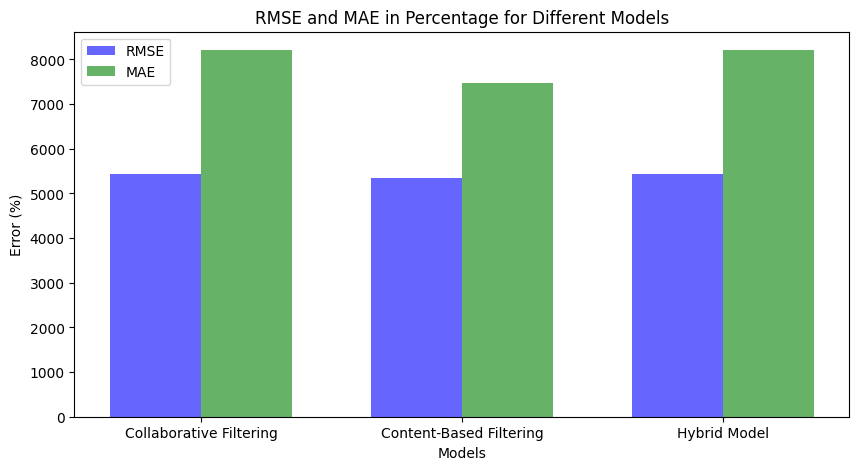

In [97]:
import matplotlib.pyplot as plt

# Create lists to store the accuracy values in percentage
models = ['Collaborative Filtering', 'Content-Based Filtering', 'Hybrid Model']
rmse_values = [rmse_accuracy, content_rmse_accuracy, hybrid_rmse_accuracy]
mae_values = [mae_accuracy, content_mae_accuracy, hybrid_mae_accuracy]

# Convert RMSE and MAE values to percentages
rmse_values_percentage = [value * 100 for value in rmse_values]
mae_values_percentage = [value * 100 for value in mae_values]

# Create bar plots for RMSE and MAE in percentage
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(models))
plt.bar(index, rmse_values_percentage, bar_width, color='b', alpha=0.6, label='RMSE')
plt.bar([i + bar_width for i in index], mae_values_percentage, bar_width, color='g', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error (%)')
plt.title('RMSE and MAE in Percentage for Different Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.show()

In [98]:
def recommend_for_new_user(interested_categories, interested_brands, num_recommendations=5):
    """
    Recommend products for a new user based on their interested categories and brands.
    Parameters:
    interested_categories (list): A list of categories the user is interested in.
    interested_brands (list): A list of brands the user is interested in.
    num_recommendations (int, optional): The number of product recommendations to return. Default is 5.
    Returns:
    pandas.DataFrame: A DataFrame containing the recommended products with columns 'product_name', 'brand', 'category', and 'price'.
    """
    candidate_products = df[
        (df['category'].isin(interested_categories)) |
        (df['brand'].isin(interested_brands))
    ]
    
    recommended_products = candidate_products.sort_values(by='price', ascending=False).head(num_recommendations)
    return recommended_products[['product_name', 'brand', 'category', 'price']]


def recommend_for_new_item(brand, category, price, num_recommendations=5):
    """
    Recommend users for a new item based on brand, category, and price.

    Parameters:
    brand (str): The brand of the item.
    category (str): The category of the item.
    price (float): The price of the item.
    num_recommendations (int, optional): The number of recommendations to return. Default is 5.

    Returns:
    pandas.DataFrame: A DataFrame containing the recommended users with columns 'user_id', 'product_name', and 'price'.
    """
    similar_items = df[
        (df['brand'] == brand) & 
        (df['category'] == category)
    ]
    similar_items['price_difference'] = abs(similar_items['price'] - price)
    recommended_users = similar_items.sort_values(by='price_difference').head(num_recommendations)
    return recommended_users[['user_id', 'product_name', 'price']]


In [99]:
user_id_to_recommend = 520088904  
recommendations = hybrid_recommendation(user_id_to_recommend, num_recommendations=5)

print(f"Hybrid Recommendations for User {user_id_to_recommend}:")
print(recommendations)

Hybrid Recommendations for User 520088904:
[(520088904, 'cooler', 1.1571236090108952), (520088904, 'printer', 1.1571236090108952), (520088904, 'saw', 1.1571236090108952), (520088904, 'router', 1.1571236090108952), (520088904, 'tv', 1.1571236090108952), (520088904, 'stapler', 1.117612877858866), (520088904, 'scanner', 1.1170527520956095), (520088904, 'immobilizer', 1.1128714643761508), (520088904, 'nas', 1.1102571507403025), (520088904, 'winch', 1.1034075087776325)]


In [100]:
new_users_data = {
    'user_id': [9001, 9002, 9003],  
    'interested_categories': [['computers', 'electronics'], ['electronics', 'appliances'], ['auto', 'appliances']],  
    'interested_brands': [['zalman', 'sony'], ['supermicro', 'lg'], ['carver', 'rowenta']] 
}
new_users = pd.DataFrame(new_users_data)

print(new_users)


new_items_data = {
    'product_name': ['New Cooler', 'New TV', 'New Player'], 
    'brand': ['zalman', 'lg', 'kenwood'],  
    'category': ['computers', 'electronics', 'auto'],  
    'price': [199.99, 499.99, 129.99]  
}

new_items = pd.DataFrame(new_items_data)

print(new_items)

   user_id      interested_categories  interested_brands
0     9001   [computers, electronics]     [zalman, sony]
1     9002  [electronics, appliances]   [supermicro, lg]
2     9003         [auto, appliances]  [carver, rowenta]
  product_name    brand     category   price
0   New Cooler   zalman    computers  199.99
1       New TV       lg  electronics  499.99
2   New Player  kenwood         auto  129.99


In [101]:
def hybrid_recommendation(user_id, num_recommendations=5):
    """
    Generate recommendations for a user or item based on their profile and historical data.

    Parameters:
    user_id (int or str): The ID of the user or the name of the item for which recommendations are to be generated.
    num_recommendations (int, optional): The number of recommendations to generate. Defaults to 5.

    Returns:
    list: A list of recommended items.

    The function works as follows:
    - If the user exists in the historical data, it uses collaborative filtering to generate recommendations.
    - If the user is new, it generates recommendations based on the user's profile (interested categories and brands).
    - If the input is a new item (treated as `user_id`), it generates recommendations based on the item's profile (brand, category, and price).
    - If none of the above conditions are met, it returns an empty list.
    """
    # Check if the user exists in the historical data
    if user_id in df['user_id'].unique():
        return collaborative_filtering_recommendation(user_id, num_recommendations)

    # Check if the user is new
    if user_id in new_users['user_id'].unique():
        user_profile = new_users[new_users['user_id'] == user_id].iloc[0]
        return recommend_for_new_user(user_profile['interested_categories'], user_profile['interested_brands'], num_recommendations)

    # Check if it's a new item (treat `user_id` as product_name in this case)
    if user_id in new_items['product_name'].unique():
        item_profile = new_items[new_items['product_name'] == user_id].iloc[0]
        return recommend_for_new_item(item_profile['brand'], item_profile['category'], item_profile['price'], num_recommendations)
    return []


In [102]:
# New user recommendations
user_id_to_recommend = 9001
recommendations = hybrid_recommendation(user_id_to_recommend)
print(f"Recommendations for new user {user_id_to_recommend}:")
print(recommendations)


Recommendations for new user 9001:
       product_name    brand     category     price
51272       monitor       lg    computers  64771.06
627562      monitor       lg    computers  64771.06
86316       monitor       lg    computers  64771.06
418716      monitor       lg    computers  64771.06
866584           tv  samsung  electronics  42590.13


In [103]:
from surprise import dump

# Save the model to a file
dump.dump('recommendation-service.pkl', algo=model)


In [104]:
import pandas as pd
import numpy as np

# Path to your dataset
file_path = "events.csv"

# Read the dataset
df = pd.read_csv(file_path)

# Check for problematic values
invalid_values = df[(df == np.inf) | (df == -np.inf) | (df.isna())]
print("Invalid values in the dataset:")
print(invalid_values)


Invalid values in the dataset:
       event_time event_type  product_id  category_id category_code brand  \
0             NaN        NaN         NaN          NaN           NaN   NaN   
1             NaN        NaN         NaN          NaN           NaN   NaN   
2             NaN        NaN         NaN          NaN           NaN   NaN   
3             NaN        NaN         NaN          NaN           NaN   NaN   
4             NaN        NaN         NaN          NaN           NaN   NaN   
...           ...        ...         ...          ...           ...   ...   
885124        NaN        NaN         NaN          NaN           NaN   NaN   
885125        NaN        NaN         NaN          NaN           NaN   NaN   
885126        NaN        NaN         NaN          NaN           NaN   NaN   
885127        NaN        NaN         NaN          NaN           NaN   NaN   
885128        NaN        NaN         NaN          NaN           NaN   NaN   

        price  user_id user_session  
0     

In [105]:
import pandas as pd

file_path = "events.csv"

# Read the file and print the first few lines
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4

In [106]:
import pandas as pd

file_path = "processed_data.csv"

# Read the file and print the first few lines
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


               user_id                 event_time event_type  product_id  \
0  1515915625519380411  2020-09-24 11:57:26+00:00       view      139905   
1  1515915625519014356  2020-09-24 11:57:33+00:00       view      635807   
2  1515915625519388062  2020-09-24 11:57:59+00:00       view      664325   
3  1515915625519388882  2020-09-24 11:58:24+00:00       view      716611   
4  1515915625519388929  2020-09-24 11:58:31+00:00       view      716611   

           category_id   brand   price      category product_name  
0  2144415926932472027  zalman   17.16     computers       cooler  
1  2144415923107266682  pantum  113.81     computers      printer  
2  2144415951611757447  carver   52.33  construction          saw  
3  2144415923694469257  d-link   53.14     computers       router  
4  2144415923694469257  d-link   53.14     computers       router  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515820 entries, 0 to 515819
Data columns (total 9 columns):
 #   Column        Non-Nu